In [2]:
import pandas as pd
import matplotlib.pyplot as plt
thresholds = [round((x)*0.025, 3)for x in range(17)]
print(thresholds)

[0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4]


In [3]:
def load_data(presumm, barthes):
    presumm_data = pd.read_csv(presumm)
    barthes_data = pd.read_csv(barthes)
    return presumm_data["f1"], barthes_data["f1"]

def load_multi_data(each, concat, threshold):
    each_data = pd.read_csv(each)
    concat_data = pd.read_csv(concat)
    threshold_data = pd.read_csv(threshold)
    return each_data["f1"], concat_data["f1"], threshold_data["f1"]

def draw_graph(presumm_data, barthes_data, thresholds, title, output_name, baseline=0.0):
    plt.plot(thresholds, presumm_data, label="Presumm", marker="o")
    plt.plot(thresholds, barthes_data, label="Barthes", marker="o")
    plt.title(title)
    plt.xlabel("Saliency Classification Threshold")
    plt.ylabel("F1 Score")
    plt.ylim(0, 0.6)
    if baseline != 0.0:
        plt.axhline(baseline, color='gray', linestyle='--',
                    label="Random Baseline")
    plt.legend()
    plt.savefig("../graphs/" + output_name + ".pdf")
    plt.show(block=True)

def draw_multi_graph(each_data, concat_data, threshold_data, thresholds, title, output_name, baseline=0.0):
    plt.plot(thresholds, each_data, label="Top 3 Sentence(s) per Chapter Summary", marker="o")
    plt.plot(thresholds, concat_data, label="Top 3*j Sentence(s)", marker="o")
    plt.plot(thresholds, threshold_data, label="Saliency Thresholding", marker="o")
    plt.title(title)
    plt.xlabel("Saliency Classification Threshold")
    plt.ylabel("F1 Score")
    plt.ylim(0, 0.6)
    if baseline != 0.0:
        plt.axhline(baseline, color='gray', linestyle='--',
                    label="Random Baseline")
    plt.legend()
    plt.savefig("../graphs/" + output_name + ".pdf")
    plt.show(block=True)

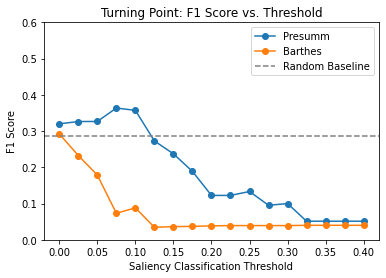

In [4]:
draw_graph(*load_data("../csv_results/presumm/turning_point-results.csv", "../csv_results/barthes/turning-point-test-results.csv"), thresholds,  "Turning Point: F1 Score vs. Threshold", "turning_point", 0.2858337492332918)

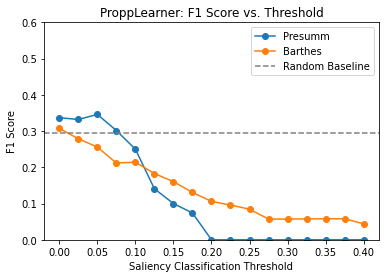

In [5]:
draw_graph(*load_data("../csv_results/presumm/propp-results.csv", "../csv_results/barthes/propp-test-results.csv"), thresholds, "ProppLearner: F1 Score vs. Threshold", "propp-f1-vs-threshold", 0.2946485849583371)

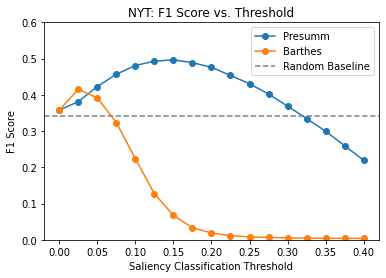

In [7]:
draw_graph(*load_data("../csv_results/presumm/presumm-nyt-test-results.csv", "../csv_results/barthes/barthes-nyt-test-results.csv"), thresholds, "NYT: F1 Score vs. Threshold", "nyt-f1-vs-threshold", 0.3410606884695083)

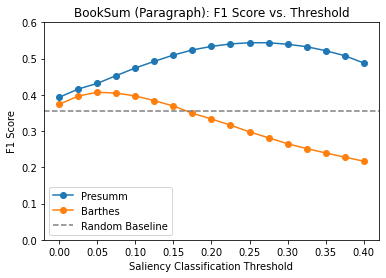

In [ ]:
draw_graph(*load_data("../csv_results/presumm/presumm-booksum-paragraph-test-results.csv", "../csv_results/barthes/barthes-booksum-paragraph-test-results.csv"), thresholds, "BookSum (Paragraph): F1 Score vs. Threshold", "booksum-paragraph-results", 0.3557083677222132)

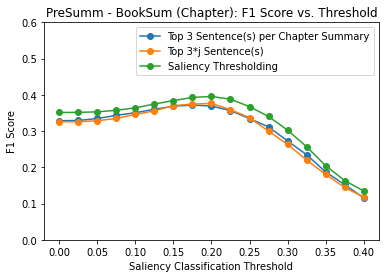

In [ ]:
draw_multi_graph(*load_multi_data("../csv_results/presumm/presumm-booksum-chapter-k3-each-test-results.csv", "../csv_results/presumm/presumm-booksum-chapter-k3-concat-test-results.csv", "../csv_results/presumm/presumm-booksum-chapter-test-results.csv"), thresholds, "PreSumm - BookSum (Chapter): F1 Score vs. Threshold", "presumm-booksum-chapter-results")

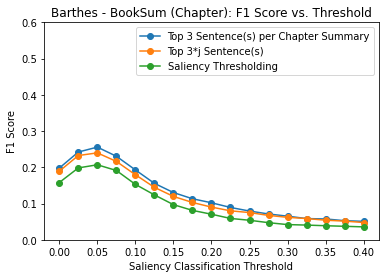

In [ ]:
draw_multi_graph(*load_multi_data("../csv_results/barthes/barthes-booksum-chapter-k3-each-test-results.csv", "../csv_results/barthes/barthes-booksum-chapter-k3-concat-test-results.csv", "../csv_results/barthes/barthes-booksum-chapter-test-results.csv"), thresholds, "Barthes - BookSum (Chapter): F1 Score vs. Threshold", "barthes-booksum-chapter-results")

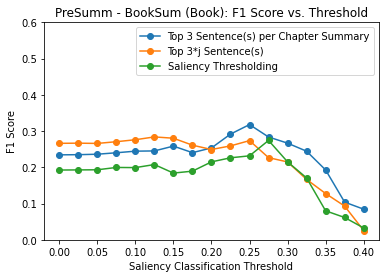

In [ ]:
draw_multi_graph(*load_multi_data("../csv_results/presumm/presumm-booksum-book-k3-each-test-results.csv", "../csv_results/presumm/presumm-booksum-book-k3-concat-test-results.csv", "../csv_results/presumm/presumm-booksum-book-test-results.csv"), thresholds, "PreSumm - BookSum (Book): F1 Score vs. Threshold", "presumm-booksum-book-results")

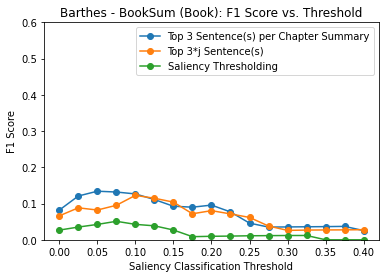

In [ ]:
draw_multi_graph(*load_multi_data("../csv_results/barthes/barthes-booksum-book-k3-each-test-results.csv", "../csv_results/barthes/barthes-booksum-book-k3-concat-test-results.csv", "../csv_results/barthes/barthes-booksum-book-test-results.csv"), thresholds, "Barthes - BookSum (Book): F1 Score vs. Threshold", "barthes-booksum-book-results")